GEODATA-HARVESTER NOTEBOOK - WITH GEE
--------------------------------------

NOTE THAT THIS NOTEBOOK REQUIRES A GOOGLE EARTH ENGINE ACCOUNT AND AUTHENTICATION.

Please follow the instructions in [GEE Setup](https://sydney-informatics-hub.github.io/AgReFed-Workshop/pydocs/setup-gee) to set up your GEE account. If you run the notebook on your local machine, this will need to be done only once.

The Geodata-Harvester enables researchers with reusable workflows for automatic data extraction from a range of data sources including spatial-temporal processing into useable formats. User provided data is auto-completed with a suitable set of spatial- and temporal-aligned covariates as a ready-made dataset for machine learning and agriculture models. In addition, all requested data layer maps are automatically extracted and aligned for a specific region and time period.

The main workflow of the Harvester is as follows:

Options and user settings (e.g., data layer selections, spatial coverage, temporal constraints, i/o directory names) are defined by the user in a yaml settings file.

The notebook imports settings and all Python modules that include functionality to download and extract data for each data source. After settings are read in, checked, and processed into valid data retrieval (API) queries, all selected data layers are sequentially downloaded and then processed into a clean dataframe table and co-registered raster maps. The entire workflow can be run either completely automatically, as demonstrated in this example, or individually by selecting only certain process parts.

This example notebook extends the basic example with Google Earth Engine layers.

The following data sources are retrieved using the modules listed below:
(see `settings file: seetings/settings_harvest_withGEE.yaml`)

- 'eeharvest': Google Earth Engine data sources
- 'getdata_slga.py': Soil Data from Soil and Landscape Grid of Australia (SLGA)
- 'getdata_landscape': Landscape data from Soil and Landscape Grid of Australia (SLGA)
- 'getdata_silo.py': Climate Data from SILO
- 'getdata_dem.py: 'National Digital Elevation Model (DEM) 1 Second plus Slope and Apect calculation
- 'getdata_dea_nci.py: 'Digital Earth Australia's (DEA) Geoscience Earth Observations via NCI server
- 'getdata_dea.py: 'Digital Earth Australia's (DEA) Geoscience Earth Observations via Open Web Service server provided by DEA
- 'getdata_radiometric.py': Geoscience Australia National Geophysical Compilation Sub-collection Radiometrics

For more details. please see README and the Data Overview page.

This notebook is part of the Data Harvester project developed for the Agricultural Research Federation (AgReFed).

Copyright 2023 Sydney Informatics Hub (SIH), The University of Sydney

### Import libraries

In [1]:
import os
import pandas as pd
import IPython
# Import harvest function from geodata_harvester
from geodata_harvester import harvest, settingshandler
# import eeharvest package (extension of geodata-harvester for Google Earth Engine)
import eeharvest

### Check GEE authentication
This initialises the GEE API and checks if the user is authenticated. If not, the user is prompted to authenticate, and follow instructions in [GEE Setup](https://sydney-informatics-hub.github.io/AgReFed-Workshop/pydocs/setup-gee).

In [2]:
eeharvest.harvester.initialise(auth_mode = 'notebook')

⊙ Initialising Earth Engine... 5.1s                                    
✔ Done


### Specify settings file

Set settings in settings YAML file beforehand, such as data-layer names, region, and dates. 

In [3]:
# Path to file:
path_settings = 'settings'
# Filename
fname_settings = 'settings_harvest_withGEE.yaml'
infname = os.path.join(path_settings,fname_settings)

### Inspect Settings
Show configuration of settings file as used in the notebook.
For more details on settings, see documentation [Settings_Overview.md](https://github.com/Sydney-Informatics-Hub/geodata-harvester/blob/main/quarto/docs/Settings_Overview.md).

In [4]:
# print settings as json
settingshandler.display_settings(infname)

# store settings as namespace (easier to interact with)
settings = settingshandler.main(infname)

{
    "colname_lat": "Lat",
    "colname_lng": "Long",
    "date_max": "2022-11-30",
    "date_min": "2022-10-01",
    "infile": "data/example-site_llara.csv",
    "outpath": "results_harvest_withGEE/",
    "target_bbox": [
        149.769345,
        -30.335861,
        149.949173,
        -30.206271
    ],
    "target_res": 6.0,
    "target_sources": {
        "DEA": [
            "landsat_barest_earth",
            "ga_ls_ard_3"
        ],
        "DEM": [
            "DEM"
        ],
        "GEE": {
            "download": {
                "bands": "NDVI"
            },
            "preprocess": {
                "bound": null,
                "buffer": null,
                "collection": "LANDSAT/LC09/C02/T1_L2",
                "mask_clouds": true,
                "reduce": "median",
                "spectral": "NDVI"
            }
        },
        "Landscape": [
            "Slope",
            "Aspect"
        ],
        "Radiometric": [
            "radmap2019_grid_dose_te

### Automating Data Harvest

The harvest.run function automatically runs all download and processing steps for all requested data sources as specified in settings file above. While this provides a simple and fast way to download and process data, it is also possible to run the individual steps separately, which offers more options for processing. For more details on the individual steps please see [source code](https://github.com/Sydney-Informatics-Hub/geodata-harvester/blob/main/src/geodata_harvester/harvest.py) and documentation within the individual modules. Alternatively review the [workshop page](https://sydney-informatics-hub.github.io/AgReFed-Workshop/pydocs/py00-workshop.html) for an introduction on the individual steps.

The harvest.run functions returns a dataframe with filenames of all downloaded data layers. All results and images are saved to disk in the output directory as specified in settings file.

The following main steps are automatically executed within the harvest.run() function:

- loading settings from config yaml file
- if bounding box is not provided, create bounding box from input file points plus padding of 0.05 deg
- GEE authorization
- downloading data layers for each source as specified in settings file (this may take a while, depending on number of layers, size of region, and speed of internet connection)
- processing data layers as specified in settings file (e.g., temporal binning)
- save downloaded image files to disk as GeoTiffs (.tif)
- save summary table of downloaded files as CSV ( see `download_summary.csv`)
- extract data for point locations provided in input file (Lat and Long columns)
- save extracted point result table to disk as CSV (`results.csv`) and as geopackage (`results.gpkg`)
- preview-check of generated raster maps (for analysis, please use the generated GeoTiffs)

Starting the data harvester -----
ℹ Found the following 7 sources: ['DEA', 'DEM', 'Landscape', 'Radiometric', 'SILO', 'SLGA', 'GEE']

⊙ Initialising Earth Engine... 0.0s                                    
✔ Done

⌛ Downloading Google Earth Engine data...
Running preprocess() -----
ℹ Number of image(s) found: 1
⊙ Applying scale, offset and cloud masks... 1.3s                       
⊙ Calculating spectral indices: NDVI... 0.8s                           
✔ Preprocessing complete
Running download() -----
ℹ Band(s) selected: ['NDVI_median']
ℹ Setting scale to ~160.2m, converted from 6.0 arcsec at latitude -30.27
ℹ Setting download dir to results_harvest_withGEE/ee
⊙ Downloading ee_LANDSAT_dbbc2809.tif 3.9s                             
✔ Google Earth Engine download(s) complete
Running preprocess() -----
ℹ Number of image(s) found: 2
⊙ Applying scale, offset and cloud masks... 1.6s                       
⊙ Calculating spectral indices: NDVI... 1.0s                           
✔ Preprocessing

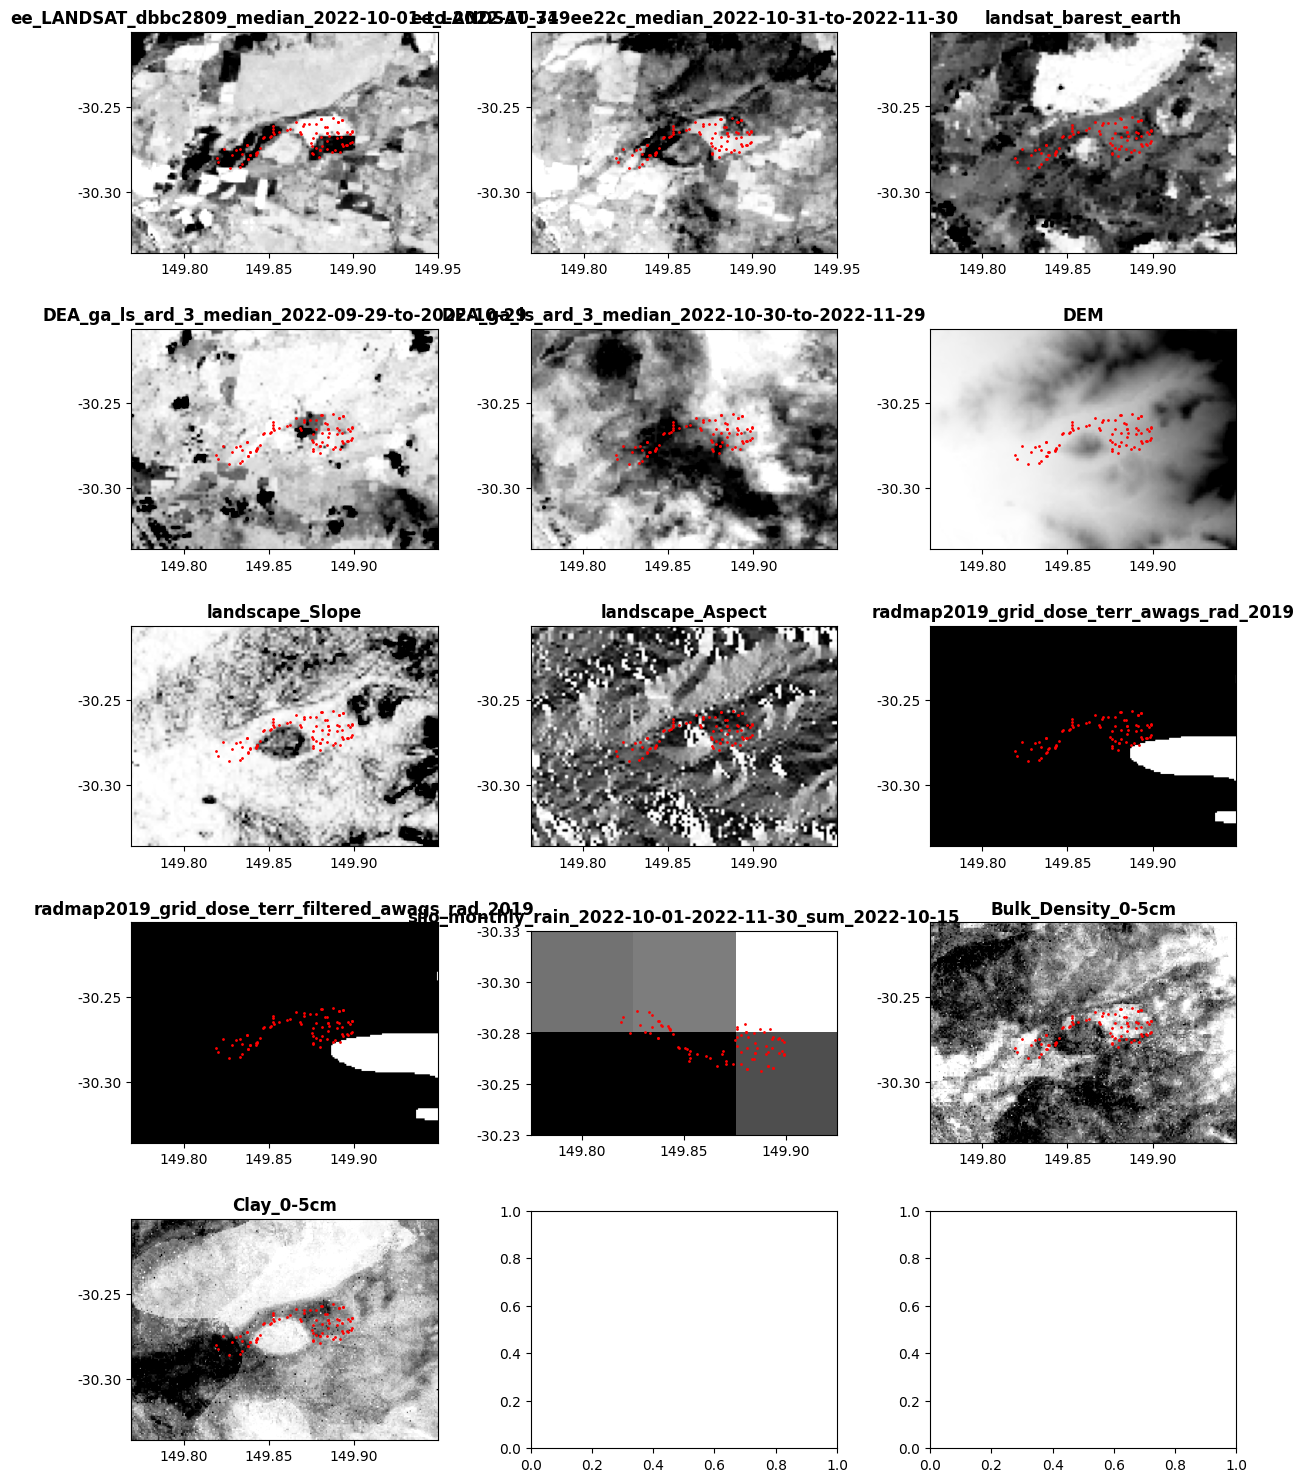


🎉 🎉 🎉 Harvest complete 🎉 🎉 🎉


In [5]:
# run automatic harvest function including GEE data
df = harvest.run(infname, preview = True, return_df = True)

### Inspect result dataframe

The result dataframe contains extracted data from all data sources for the locations as specified in the input file. The dataframe can be used for further processing or analysis.
This dataframe table is also saved as csv file in the output directory.

In [6]:
# render pandas dataframe df as html table in jupyter notebook
IPython.display.HTML(df.to_html())
# Alternatively print head of table only:
# df.head()

,Longitude,Latitude,ee_LANDSAT_dbbc2809_median_2022-10-01-to-2022-10-31_NDVI_median,ee_LANDSAT_749ee22c_median_2022-10-31-to-2022-11-30_NDVI_median,landsat_barest_earth_red,landsat_barest_earth_green,landsat_barest_earth_blue,landsat_barest_earth_nir,landsat_barest_earth_swir1,landsat_barest_earth_swir2,DEA_ga_ls_ard_3_median_2022-09-29_nbart_blue,DEA_ga_ls_ard_3_median_2022-09-29_nbart_green,DEA_ga_ls_ard_3_median_2022-09-29_nbart_red,DEA_ga_ls_ard_3_median_2022-09-29_nbart_nir,DEA_ga_ls_ard_3_median_2022-09-29_nbart_swir_1,DEA_ga_ls_ard_3_median_2022-09-29_nbart_swir_2,DEA_ga_ls_ard_3_median_2022-09-29_oa_fmask,DEA_ga_ls_ard_3_median_2022-10-30_nbart_blue,DEA_ga_ls_ard_3_median_2022-10-30_nbart_green,DEA_ga_ls_ard_3_median_2022-10-30_nbart_red,DEA_ga_ls_ard_3_median_2022-10-30_nbart_nir,DEA_ga_ls_ard_3_median_2022-10-30_nbart_swir_1,DEA_ga_ls_ard_3_median_2022-10-30_nbart_swir_2,DEA_ga_ls_ard_3_median_2022-10-30_oa_fmask,DEM_SRTM_1_Second_Hydro_Enforced_2023_08_21_1,Landscape_Slope_1,Landscape_Aspect_1,radiometric_radmap2019_grid_dose_terr_awags_rad_2019_radmap2019_grid_dose_terr_awags_rad_2019,radiometric_radmap2019_grid_dose_terr_filtered_awags_rad_2019_radmap2019_grid_dose_terr_filtered_awags_rad_2019,silo_monthly_rain_2022-10-01-2022-11-30_sum_2022-10-15_1,SLGA_Bulk_Density_0-5cm_1,SLGA_Clay_0-5cm_1,geometry
0,149.852680,-30.264663,0.522849,0.247036,1059.0,809.0,541.0,1719.0,2162.0,1815.0,235.0,402.0,253.0,4341.0,970.0,392.5,1.0,5359.5,5573.5,5813.5,6483.0,1929.0,1612.5,1.5,244.658585,1.046624,209.138062,33.151680,32.962944,269.699951,1.368779,27.214527,POINT (149.85268 -30.26466)
1,149.884838,-30.265302,0.123883,0.167186,1082.0,819.0,540.0,1702.0,2083.0,1800.0,578.5,831.5,947.0,2171.5,2019.0,1613.5,1.0,4500.0,4630.0,4659.0,5580.0,1526.0,1329.5,1.5,264.428772,1.001000,279.542847,35.969486,35.945480,263.199951,1.362662,31.956041,POINT (149.88484 -30.26530)
2,149.884838,-30.265302,0.123883,0.167186,1082.0,819.0,540.0,1702.0,2083.0,1800.0,578.5,831.5,947.0,2171.5,2019.0,1613.5,1.0,4500.0,4630.0,4659.0,5580.0,1526.0,1329.5,1.5,264.428772,1.001000,279.542847,35.969486,35.945480,263.199951,1.362662,31.956041,POINT (149.88484 -30.26530)
3,149.838791,-30.278542,0.488897,0.228174,1092.0,859.0,601.0,1801.0,2369.0,1961.0,342.5,530.0,394.0,4019.0,1124.0,573.0,1.0,5286.5,5631.0,5982.5,6612.5,2410.5,1951.0,1.5,233.005081,0.841430,242.743683,29.618393,29.478428,258.599854,1.360451,32.675858,POINT (149.83879 -30.27854)
4,149.830843,-30.275437,0.464824,0.185975,1160.0,907.0,626.0,1901.0,2555.0,2106.0,336.0,612.5,366.0,4607.0,1861.0,826.5,1.0,4990.5,5195.0,5154.0,7040.0,1692.5,1392.0,1.5,230.575439,1.062537,242.921112,25.061012,24.757614,258.599854,1.334362,35.097813,POINT (149.83084 -30.27544)
5,149.837390,-30.272546,0.461214,0.186517,1176.0,913.0,621.0,2003.0,2698.0,2180.0,448.0,798.0,782.0,3489.5,1320.0,735.0,1.0,5243.5,5534.5,5638.5,6445.5,2128.0,1743.5,1.5,234.390594,0.474602,218.443161,33.548824,33.348145,269.699951,1.381845,27.269773,POINT (149.83739 -30.27255)
6,149.884349,-30.274718,0.423914,0.079271,1006.0,774.0,516.0,1538.0,1844.0,1585.0,387.5,647.5,601.0,2798.0,1315.5,746.5,1.0,4860.5,5169.5,5444.5,5658.5,2161.5,1694.0,1.5,263.179749,1.135136,189.133453,37.309677,37.352158,263.199951,1.381452,23.636356,POINT (149.88435 -30.27472)
7,149.834467,-30.283844,0.436778,0.106983,1038.0,825.0,549.0,1935.0,2306.0,1780.0,365.0,585.0,455.5,3903.0,1165.5,565.0,1.0,5067.0,5400.5,5776.0,6357.5,2676.0,2181.0,1.5,231.333786,0.564514,274.254364,32.407440,32.487774,258.599854,1.351733,41.639271,POINT (149.83447 -30.28384)
8,149.875227,-30.271458,0.124853,0.090514,980.0,761.0,516.0,1517.0,1892.0,1591.0,747.0,973.5,1215.0,2029.5,2701.0,2124.0,1.0,4937.0,5186.5,5356.5,5424.5,1982.5,1910.5,1.5,256.943665,1.165965,239.259262,34.952850,34.845993,263.199951,1.353937,31.951994,POINT (149.87523 -30.27146)
9,149.887489,-30.276671,0.419985,0.097730,1037.0,791.0,520.0,1621.0,2005.0,1716.0,329.5,550.5,477.0,2761.5,1046.5,530.0,1.0,4849.0,5174.5,5493.5,5859.5

### Overview of downloaded files
Provides an overview of all downloaded files. The files are saved in the output directory as specified in settings file (see column `filename_out` below).

In [7]:
# list all files in the output directory
df_log = pd.read_csv(os.path.join(settings.outpath, 'download_summary.csv'))

# render pandas dataframe as html table
IPython.display.HTML(df_log.to_html())

,layername,agfunction,dataset,layertitle,filename_out,loginfo
0,ee_LANDSAT_dbbc2809,median,GEE,ee_LANDSAT_dbbc2809_median_2022-10-01-to-2022-10-31,results_harvest_withGEE/ee/ee_LANDSAT_dbbc2809_median_2022-10-01-to-2022-10-31.tif,downloaded
1,ee_LANDSAT_749ee22c,median,GEE,ee_LANDSAT_749ee22c_median_2022-10-31-to-2022-11-30,results_harvest_withGEE/ee/ee_LANDSAT_749ee22c_median_2022-10-31-to-2022-11-30.tif,downloaded
2,landsat_barest_earth,median,DEA,landsat_barest_earth,results_harvest_withGEE/dea/landsat_barest_earth.tif,downloaded
3,ga_ls_ard_3,median,DEA,DEA_ga_ls_ard_3_median_2022-09-29-to-2022-10-29,results_harvest_withGEE/DEA_ga_ls_ard_3_median_2022-09-29.tif,downloaded
4,ga_ls_ard_3,median,DEA,DEA_ga_ls_ard_3_median_2022-10-30-to-2022-11-29,results_harvest_withGEE/DEA_ga_ls_ard_3_median_2022-10-30.tif,downloaded
5,DEM,NaN,DEM,DEM,results_harvest_withGEE/DEM_SRTM_1_Second_Hydro_Enforced_2023_08_21.tif,downloaded
6,Slope,NaN,Landscape,landscape_Slope,results_harvest_withGEE/Landscape_Slope.tif,downloaded
7,Aspect,NaN,Landscape,landscape_Aspect,results_harvest_withGEE/Landscape_Aspect.tif,downloaded
8,radmap2019_grid_dose_terr_awags_rad_2019,NaN,Radiometric,radmap2019_grid_dose_terr_awags_rad_2019,results_harvest_withGEE/radiometric_radmap2019_grid_dose_terr_awags_rad_2019.tif,downloaded
9,radmap2019_grid_dose_terr_filtered_awags_rad_2019,NaN,Radiometric,radmap2019_grid_dose_terr_filtered_awags_rad_2019,results_harvest_withGEE/radiometric_radmap2019_grid_dose_terr_filtered_awags_rad_2019.tif,downloaded
